# Data preparation and feature selection

We present different techniques for encode the data and prepare them for applying ML algorithms. Also we present techniques for feature selection.

By Mario Martín, modify by Manuel Gijón on April 2024.

----

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.neighbors as nb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import (
    mutual_info_classif, 
    SelectKBest
)
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score,
    cross_val_predict,
    GridSearchCV
)
from sklearn.feature_selection import (
    mutual_info_classif, 
    SelectKBest,
)

%matplotlib inline

In [10]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# The dataset does not contains header, but this names for the features has been found in dataset's description  
names = [ 
    "Age", "Workclass", "fnlwgt", "Education", 
    "Education-Num", "Martial Status", "Occupation", "Relationship", 
    "Race", "Sex", "Capital Gain", "Capital Loss", 
    "Hours per week", "Country", "Target"
]

df = pd.read_csv(
    URL,
    sep=',', 
    na_values=" ?",
    header=None,
    names=names
)

df=df.drop(labels='fnlwgt',axis=1)
df.head(n=10)

,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# DATA TRANSFORMATION: Encoding

## OneHotEncoding

In [11]:
# Categorical to numerical using OneHotEncoding for all features
pd.get_dummies(df).head()

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#df.groupby('Workclass').head()
df.groupby('Workclass').size()

Workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
dtype: int64

In [13]:
df.describe()

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#Categorical to numerical using OneHotEncoding for some features (Workclass) and removing one value
pd.get_dummies(df, columns=["Workclass"],drop_first=True).head()

,Age,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


## LabelEncoding

Attend the proportions in which each categorical value is presented in the feature.

In [15]:
df.groupby('Education').size() / len(df)

Education
 10th            0.028654
 11th            0.036086
 12th            0.013298
 1st-4th         0.005160
 5th-6th         0.010227
 7th-8th         0.019840
 9th             0.015786
 Assoc-acdm      0.032769
 Assoc-voc       0.042443
 Bachelors       0.164461
 Doctorate       0.012684
 HS-grad         0.322502
 Masters         0.052916
 Preschool       0.001566
 Prof-school     0.017690
 Some-college    0.223918
dtype: float64

In [16]:
df.shape

(32561, 14)

In [17]:
# We are going to create a dictionary with the category and the value we want to replace it for
Education_dict = {
 ' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' Some-college': 9,
 ' Prof-school': 10,
 ' Bachelors': 11,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 13,
 ' HS-grad': 14,
 ' Masters': 15,
 ' Doctorate': 16}

df['Education'] = df.Education.map(Education_dict)  # OBS: Python allows us to use a dictionary as a 'function' 
                                                    # in this case, no need to create a lambda

In [18]:
df.groupby('Education').size()/ len(df)

Education
1     0.001566
2     0.005160
3     0.010227
4     0.019840
5     0.015786
6     0.028654
7     0.036086
8     0.013298
9     0.223918
10    0.017690
11    0.164461
12    0.032769
13    0.042443
14    0.322502
15    0.052916
16    0.012684
dtype: float64

# DATA TRANSFORMATION: Normalization

In [25]:
df = pd.io.parsers.read_csv(
    #"https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    "wine_data.csv",
    header=None,
    )
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
df.describe()

,Age,Education,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,11.189705,10.080679,1077.648844,87.303830,40.437456
std,13.640433,3.054406,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,11.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,14.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,16.000000,99999.000000,4356.000000,99.000000


In [26]:
# OBS: we are going to train a model with this data, just to check its performance without standarize the data.
# - Apply Stratified K Fold to reduce the effect of the variability presented on the data on the final model.
# - Using cross validation technique we train different models on each one of the 'folds' and check the main 
#   performance.

cv = StratifiedKFold(
    n_splits=10,
    random_state=1,
    shuffle=True
)

cv_scores = cross_val_score(
    nb.KNeighborsClassifier(),
    X=X_wine,
    y=y_wine,
    cv=cv,
    scoring='accuracy',
)
np.mean(cv_scores)

0.7140522875816994

In [30]:
# OBS: we are going to use Grid Search (GS) in order to find the best hyperparameters for this model
# For each one of the hyperparameters of the model we try the next possible values
# GS will train a model for each one of the possible combinations (BE AWARE OF THE COMPUTATIONAL COST)
params = {
    "n_neighbors":list(range(1,20,2)), 
    "weights":('distance','uniform')
}

knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(
    n_splits=10,
    random_state=1,
    shuffle=True
)
clf = GridSearchCV(
    knc,  # The instance of the model
    param_grid = params,  # The dictionary with pairs hyperparameter - possible values
    cv = cv,  # If cv is integer, by default is Stratifyed
    n_jobs=-1
)  
clf.fit(X_wine, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 1, 'weights': 'distance'} Accuracy= 0.7640522875816993


In [31]:
# Poor score. What could happen? 
# Remeber that all columns should be in the same range for KNN!!
# Could be that each colum is in a different range?

for i in range(13):
    print('std:',X_wine[:,i].std(),'min',X_wine[:,i].min(),'max',X_wine[:,i].max())

std: 0.8095429145285168 min 11.03 max 14.83
std: 1.1140036269797893 min 0.74 max 5.8
std: 0.27357229442643255 min 1.36 max 3.23
std: 3.3301697576582128 min 10.6 max 30.0
std: 14.242307673359806 min 70.0 max 162.0
std: 0.6240905641965369 min 0.98 max 3.88
std: 0.996048950379233 min 0.34 max 5.08
std: 0.12410325988364795 min 0.13 max 0.66
std: 0.5707488486199379 min 0.41 max 3.58
std: 2.3117646609525573 min 1.28 max 13.0
std: 0.22792860656507252 min 0.48 max 1.71
std: 0.7079932646716005 min 1.27 max 4.0
std: 314.0216568419878 min 278.0 max 1680.0


In [32]:
# One way is to standarize all data mean 0, std 1
scaler = StandardScaler().fit(X_wine)
X2=scaler.transform(X_wine)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -2.4342353470856977 max 2.2597715200031785
std: 1.0 min -1.4329830495567168 max 3.1091924671589037
std: 1.0 min -3.6791622340370105 max 3.156325269990446
std: 1.0 min -2.6710181364687173 max 3.1545107139410433
std: 1.0 min -2.0882551982316313 max 4.371372139554768
std: 0.9999999999999999 min -2.107246023249296 max 2.539515466781404
std: 1.0 min -1.6959705266274119 max 3.0628317372525964
std: 1.0 min -1.8682340238414565 max 2.4024031898537954
std: 0.9999999999999998 min -2.0690341807257084 max 3.4850725120254245
std: 1.0 min -1.634288275894709 max 3.435431924417896
std: 1.0 min -2.0947324050170844 max 3.3016942153020326
std: 1.0 min -1.8950538941648851 max 1.960914991734472
std: 1.0 min -1.493187645535251 max 2.971472575990396


In [19]:
# EX: try to repeat the process for training a new model but now with the new standarized dataset and check
# the performance.

# FEATURE SELECTION: Effect of irrelevant columns

/var/folders/9y/h_htr0yd59j121xzw7vclx6h0000gn/T/ipykernel_65694/2171491062.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,4,i)


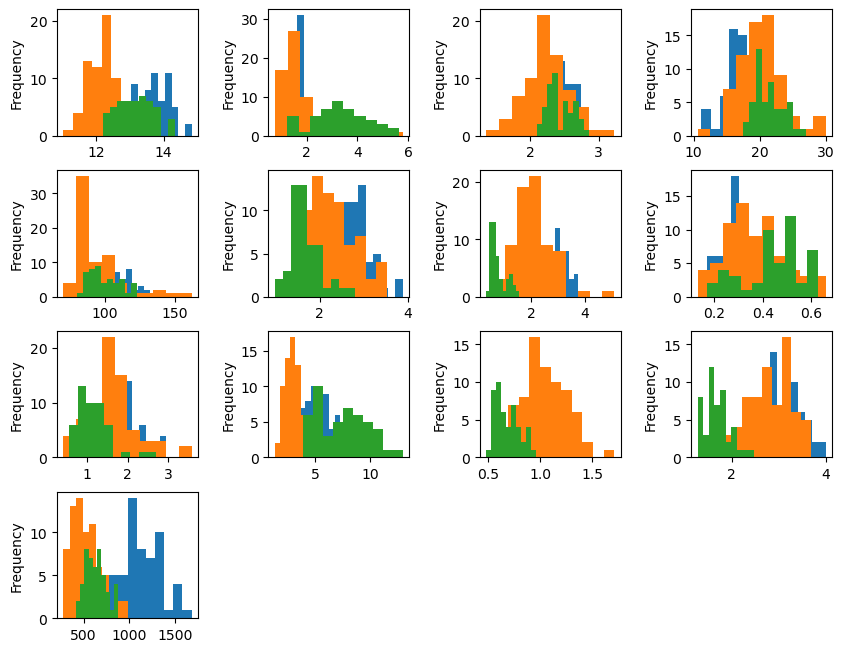

In [34]:
# Could you say wich features are more important (contain more information about the target variable's value)
# attending only to their distributions?

plt.subplots(figsize=(10, 10))
plt.subplots_adjust(hspace=0.27,wspace=0.5)
for i in range(1,14):
    plt.subplot(5,4,i)
    df[y_wine==1][i].plot.hist(bins=10)
    df[y_wine==2][i].plot.hist(bins=10)
    df[y_wine==3][i].plot.hist(bins=10)
plt.show()


In [36]:
nrcols=20
col = np.random.random(size=(X2.shape[0],nrcols))
scaler = StandardScaler().fit(col)
irelevant = scaler.transform(col)
for i in range(nrcols):
    print('std:',irelevant[:,i].std(),'min',irelevant[:,i].min(),'max',irelevant[:,i].max())

std: 0.9999999999999997 min -1.8887471033725385 max 1.616328650900334
std: 1.0 min -1.8087975727932393 max 1.6588554422616246
std: 1.0 min -1.748045476726365 max 1.6321600382950925
std: 1.0 min -1.6264413421654809 max 1.69804203608542
std: 1.0 min -1.8136340363774646 max 1.6359355561105389
std: 0.9999999999999997 min -1.7717234276033076 max 1.7602977262686255
std: 1.0000000000000002 min -1.7152760220608543 max 1.7915823406124352
std: 1.0 min -1.642052778035852 max 1.620815570800323
std: 0.9999999999999997 min -2.046565721530483 max 1.7802788903055886
std: 1.0 min -1.6743913309933833 max 1.630282743827606
std: 1.0000000000000002 min -1.6450572069437257 max 1.7779107020467482
std: 1.0 min -1.7313001680437594 max 1.693037942084647
std: 0.9999999999999998 min -1.7232620889436083 max 1.5543682310686853
std: 1.0 min -1.7116502646177305 max 1.7355522551072837
std: 1.0 min -1.793046796092319 max 1.719198048036688
std: 0.9999999999999996 min -1.7504954229890963 max 1.7597063084245141
std: 1.0 m

In [37]:
X2_new = np.hstack((X2,irelevant))
cv = StratifiedKFold(
    n_splits = 10,
    random_state = 1,
    shuffle = True
)
cv_scores = cross_val_score(
    nb.KNeighborsClassifier(n_neighbors = 9), 
    X = X2_new, 
    y = y_wine,
    cv = cv, 
    scoring = "accuracy"  # the metric we use for evaluate the performance
)  
print(np.mean(cv_scores))

0.9431372549019608


In [39]:
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(
    n_splits = 10,
    random_state = 1,
    shuffle = True
)
clf = GridSearchCV(
    knc, 
    param_grid = params,
    cv = cv,
    n_jobs = -1
)
clf.fit(X2_new, y_wine)
print(f"Best Params = {clf.best_params_} - Accuracy = {clf.best_score_}")

Best Params = {'n_neighbors': 13, 'weights': 'distance'} - Accuracy = 0.9601307189542483


# Feature Selection: Ranking

Lets pressent a technique for measuring the relevance of each one of the features in order to create the classifier.

In [45]:
# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=2).fit_transform(X2_new, y_wine)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(
    n_splits=10,
    random_state=1,
    shuffle=True
)
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,)  # If cv is integer, by default is Stratifyed
clf.fit(X_reduced, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 5, 'weights': 'distance'} Accuracy= 0.9493464052287581


In [46]:
# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=13).fit_transform(X2_new, y_wine)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(
    n_splits=10,
    random_state=1,
    shuffle=True
)
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
clf.fit(X_reduced, y_wine)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 13, 'weights': 'distance'} Accuracy= 0.9722222222222221


In [47]:
X2_new.shape

(178, 33)

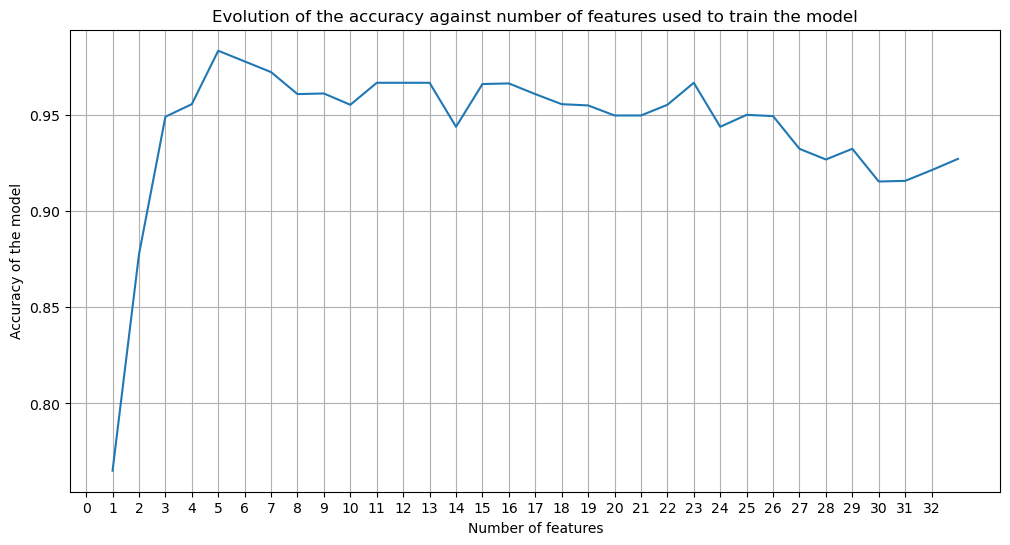

In [52]:
original = np.zeros(33)
for i in range(33):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2_new, y_wine)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=y_wine, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)
    
fig = plt.figure(figsize = (12, 6))  # Just declare the figure object and give dimensions
plt.grid(True)
plt.title("Evolution of the accuracy against number of features used to train the model")
plt.ylabel("Accuracy of the model")
plt.xlabel("Number of features")
plt.xticks(np.arange(0, 33, step=1))
plt.plot(range(1,34), original)
plt.show()